# bthal dataset v6b - miscellaneous plots

In [1]:
%matplotlib widget
%load_ext watermark

import warnings
warnings.filterwarnings('ignore')

import os, sys, json, operator, getpass
from pathlib import Path
from datetime import datetime

import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets


sc.settings.verbosity = 3             # show some output
sc.settings.file_format_figs = 'svg'  # set this to 'svg' (notebook) or 'pdf' (files) if you want vector graphics
sc.settings.savefigs = False

# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Arial'
# plt.rc('font', size=14)

home = str(Path.home())
user = getpass.getuser()

%watermark --iversions

sys       : 3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
numpy     : 1.24.4
seaborn   : 0.13.0
ipywidgets: 8.1.2
json      : 2.0.9
matplotlib: 3.7.4
pandas    : 2.0.3
scanpy    : 1.9.8



In [3]:
with open('/.singularity.d/labels.json') as fh:
    singularity = json.load(fh)
    
singularity['Version']

'proteus.45g'

In [4]:
now = datetime.now()
prefix = now.strftime('%Y%m%d')
print(prefix)

20240328


## Embedding overlay plots
---

In [8]:
%%time
adata = sc.read('20230711_bthalcombo_v6b_lognorm_multi_annotated_scores_galore_clusters')

CPU times: user 12.7 s, sys: 1.03 s, total: 13.8 s
Wall time: 16.8 s


In [9]:
adata

AnnData object with n_obs × n_vars = 36878 × 20098
    obs: 'library', 'donor', 'population', 'tissue', 'xample', 'doublet_scores', 'percent.mt', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'seurat_clusters', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.annot.score', 'predicted.annot', 'mapping.score', 'mapping_error_score', 'mapping_error_QC', 'predicted_CellType', 'predicted_CellType_prob', 'predicted_Pseudotime', 'GMP_score', 'MLP_score', 'MEP_score', 'HSC_score', 'Ery_priming_score', 'Meg_priming_score', 'BM_LT_HSC_TOP100', 'BM_ST_HSC_TOP100', 'human_active_HSC_TOP100', 'human_dormant_HSC_TOP100', 'Repopulation_signature', 'BM-type_score', 'SPL-type_score', 'mast_score', 'v6_leiden.20.0', 'v6_leiden.20.0_annot_CB10', 'v6_leiden.20.0_annot_CB45', 'lineage.annot', 'lineage.annot.granular', 'lineage.andy', 'lineage.andy.granular'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'line

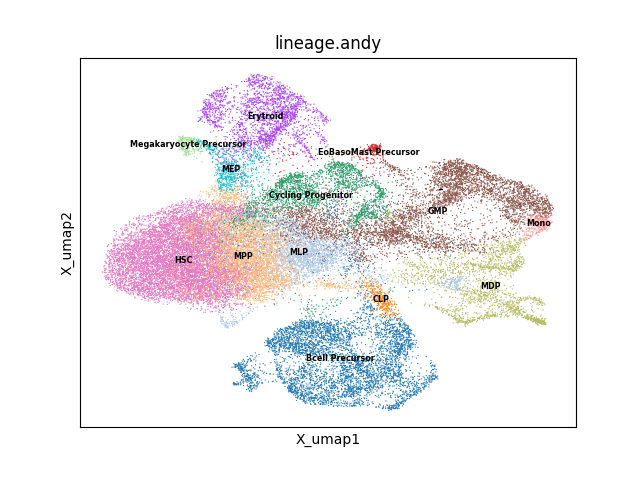

In [10]:
sc.pl.embedding(adata, basis='X_umap', color=['lineage.andy'], legend_loc='on data', legend_fontsize='xx-small' )

<Axes: title={'center': 'lineage.andy'}, xlabel='X_umap1', ylabel='X_umap2'>

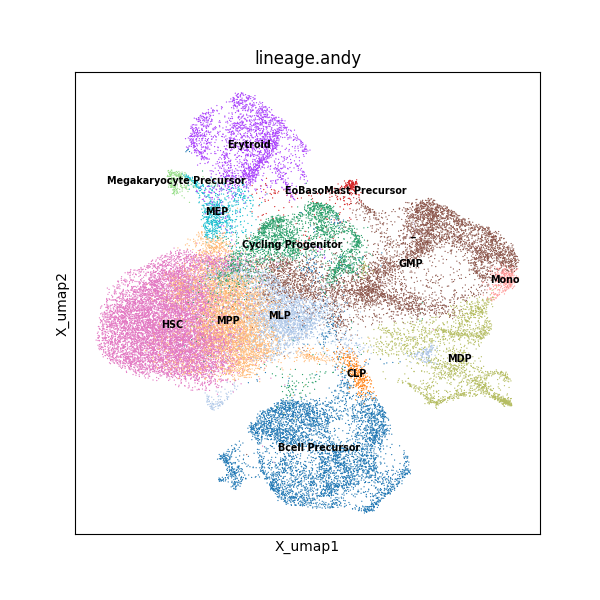

In [15]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

sc.pl.embedding(adata, basis='X_umap', color=['lineage.andy'], legend_loc='on data', legend_fontsize='x-small', ax=ax, show=False)

In [22]:
# https://matplotlib.org/stable/gallery/misc/rasterization_demo.html
# by default all artist have positive integer assigned
# ax.get_children()[0].get_zorder()

# setting the element that has the scatter collections
ax.get_children()[0].set_zorder(-10)

# it should rasterize all artists with z-order below 0
ax.set_rasterization_zorder(0)

In [23]:
%%time
plt.savefig("../output/figures/20240328_bthalcombo_v6b_UMAP_lineage_C45_rasterized_scatter.pdf", dpi=600)

CPU times: user 841 ms, sys: 60.5 ms, total: 902 ms
Wall time: 1.44 s


In [24]:
%%time
plt.savefig("../output/figures/20240328_bthalcombo_v6b_UMAP_lineage_C45_rasterized_scatter.svg")

CPU times: user 131 ms, sys: 5 ms, total: 136 ms
Wall time: 151 ms


<Axes: title={'center': 'lineage.annot'}, xlabel='X_umap1', ylabel='X_umap2'>

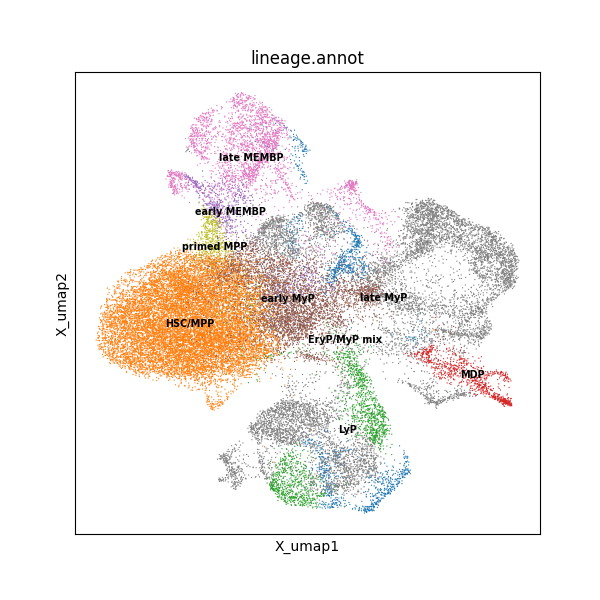

In [25]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

sc.pl.embedding(adata, basis='X_umap', color=['lineage.annot'], legend_loc='on data', legend_fontsize='x-small', ax=ax, show=False)

In [26]:
# https://matplotlib.org/stable/gallery/misc/rasterization_demo.html
# by default all artist have positive integer assigned
# ax.get_children()[0].get_zorder()

# setting the element that has the scatter collections
ax.get_children()[0].set_zorder(-10)

# it should rasterize all artists with z-order below 0
ax.set_rasterization_zorder(0)

In [27]:
%%time
plt.savefig("../output/figures/20240328_bthalcombo_v6b_UMAP_lineage_C10_rasterized_scatter.pdf", dpi=600)

CPU times: user 514 ms, sys: 30.9 ms, total: 545 ms
Wall time: 546 ms


In [28]:
%%time
plt.savefig("../output/figures/20240328_bthalcombo_v6b_UMAP_lineage_C10_rasterized_scatter.svg")

CPU times: user 150 ms, sys: 2.94 ms, total: 152 ms
Wall time: 152 ms


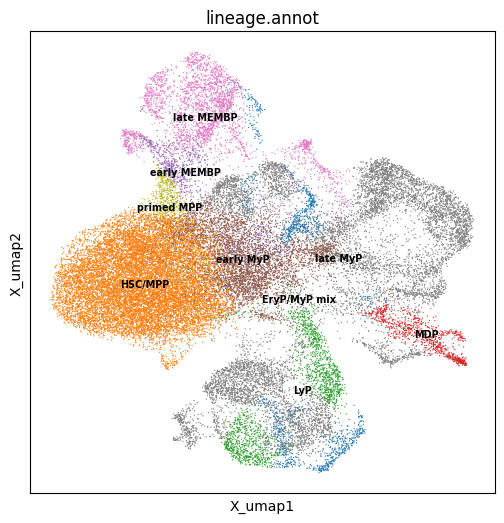

In [29]:
plt.gcf()

<Axes: title={'center': 'v6_leiden.20.0_annot_CB45'}, xlabel='X_umap1', ylabel='X_umap2'>

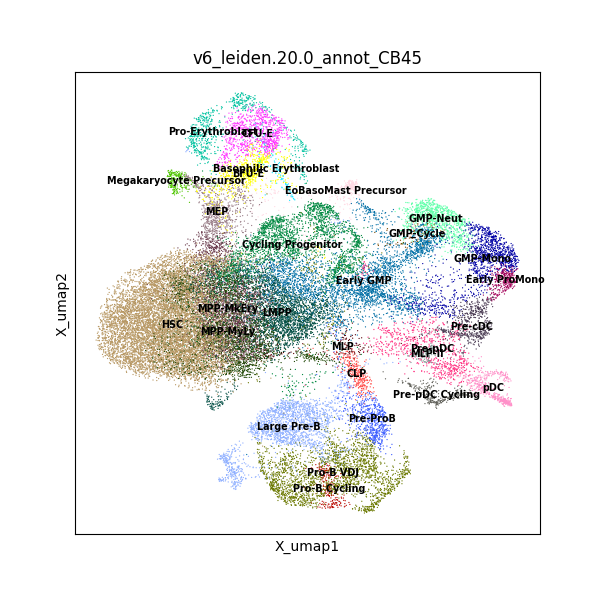

In [33]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

sc.pl.embedding(adata, basis='X_umap', color=['v6_leiden.20.0_annot_CB45'], legend_loc='on data', legend_fontsize='x-small', ax=ax, show=False)

In [34]:
# https://matplotlib.org/stable/gallery/misc/rasterization_demo.html
# by default all artist have positive integer assigned
# ax.get_children()[0].get_zorder()

# setting the element that has the scatter collections
ax.get_children()[0].set_zorder(-10)

# it should rasterize all artists with z-order below 0
ax.set_rasterization_zorder(0)

In [35]:
%%time
fname = "../output/figures/20240328_bthalcombo_v6b_UMAP_clusters_C45_rasterized_scatter"

plt.savefig(fname+'.pdf', dpi=600)
plt.savefig(fname+'.svg')

CPU times: user 677 ms, sys: 39.8 ms, total: 717 ms
Wall time: 720 ms


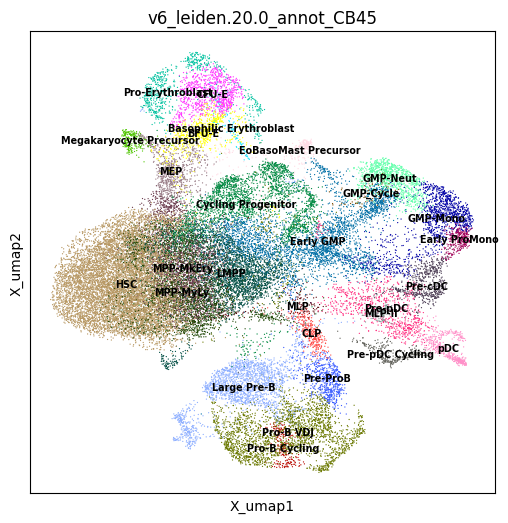

In [36]:
plt.gcf()

<Axes: title={'center': 'v6_leiden.20.0_annot_CB10'}, xlabel='X_umap1', ylabel='X_umap2'>

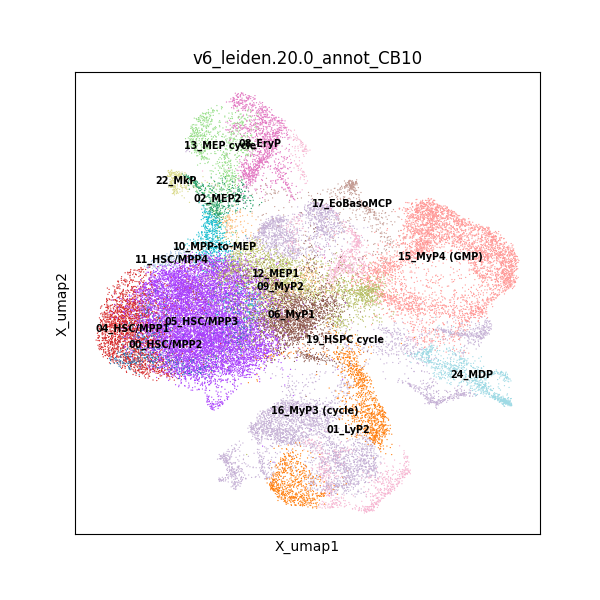

In [37]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

sc.pl.embedding(adata, basis='X_umap', color=['v6_leiden.20.0_annot_CB10'], legend_loc='on data', legend_fontsize='x-small', ax=ax, show=False)

In [38]:
# https://matplotlib.org/stable/gallery/misc/rasterization_demo.html
# by default all artist have positive integer assigned
# ax.get_children()[0].get_zorder()

# setting the element that has the scatter collections
ax.get_children()[0].set_zorder(-10)

# it should rasterize all artists with z-order below 0
ax.set_rasterization_zorder(0)

In [39]:
%%time
fname = "../output/figures/20240328_bthalcombo_v6b_UMAP_clusters_C10_rasterized_scatter"

plt.savefig(fname+'.pdf', dpi=600)
plt.savefig(fname+'.svg')

CPU times: user 665 ms, sys: 32.8 ms, total: 698 ms
Wall time: 701 ms


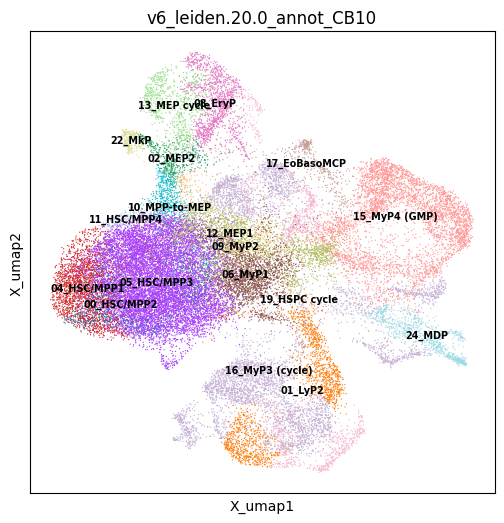

In [40]:
plt.gcf()

<Axes: title={'center': 'CDK6'}, xlabel='X_umap1', ylabel='X_umap2'>

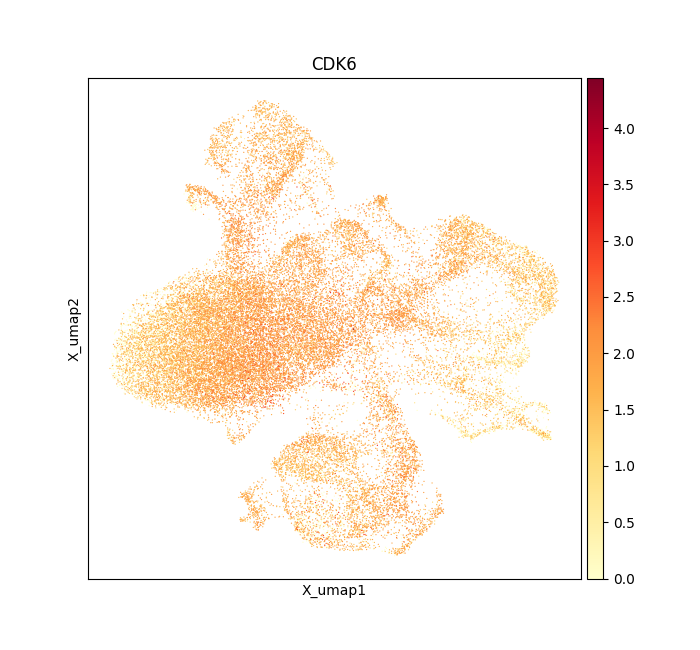

In [44]:
fig, ax = plt.subplots(1,1, figsize=(7,6.5))

sc.pl.embedding(adata, basis='X_umap', color=['CDK6'], cmap='YlOrRd', ax=ax, show=False)

In [46]:
# https://matplotlib.org/stable/gallery/misc/rasterization_demo.html
# by default all artist have positive integer assigned
# ax.get_children()[0].get_zorder()

# setting the element that has the scatter collections
ax.get_children()[0].set_zorder(-10)

# it should rasterize all artists with z-order below 0
ax.set_rasterization_zorder(0)

In [47]:
%%time
fname = "../output/figures/20240328_bthalcombo_v6b_UMAP_CDK6_expression_rasterized_scatter"

plt.savefig(fname+'.pdf', dpi=600)
plt.savefig(fname+'.svg')

CPU times: user 837 ms, sys: 46.7 ms, total: 884 ms
Wall time: 969 ms


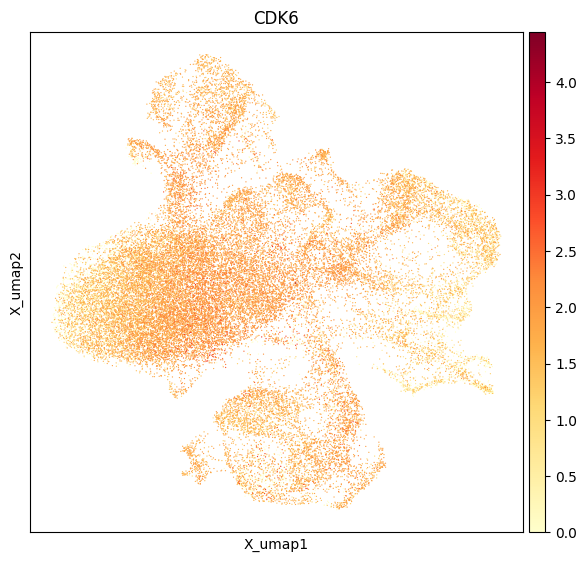

In [48]:
plt.gcf()

<Axes: title={'center': 'human_dormant_HSC_TOP100'}, xlabel='X_umap1', ylabel='X_umap2'>

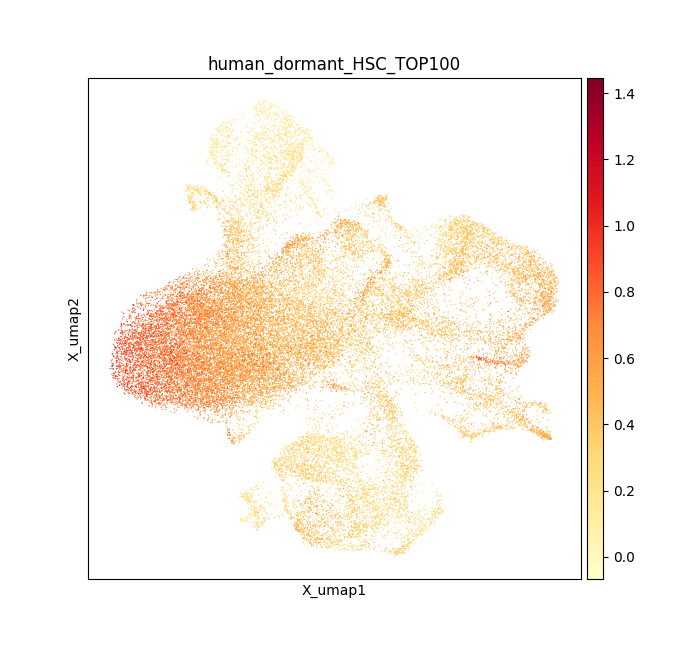

In [49]:
fig, ax = plt.subplots(1,1, figsize=(7,6.5))

sc.pl.embedding(adata, basis='X_umap', color=['human_dormant_HSC_TOP100'], cmap='YlOrRd', ax=ax, show=False)

In [50]:
# https://matplotlib.org/stable/gallery/misc/rasterization_demo.html
# by default all artist have positive integer assigned
# ax.get_children()[0].get_zorder()

# setting the element that has the scatter collections
ax.get_children()[0].set_zorder(-10)

# it should rasterize all artists with z-order below 0
ax.set_rasterization_zorder(0)

In [51]:
%%time
fname = "../output/figures/20240328_bthalcombo_v6b_UMAP_human_dormant_HSC_score_rasterized_scatter"

plt.savefig(fname+'.pdf', dpi=600)
plt.savefig(fname+'.svg')

CPU times: user 922 ms, sys: 55.7 ms, total: 978 ms
Wall time: 981 ms


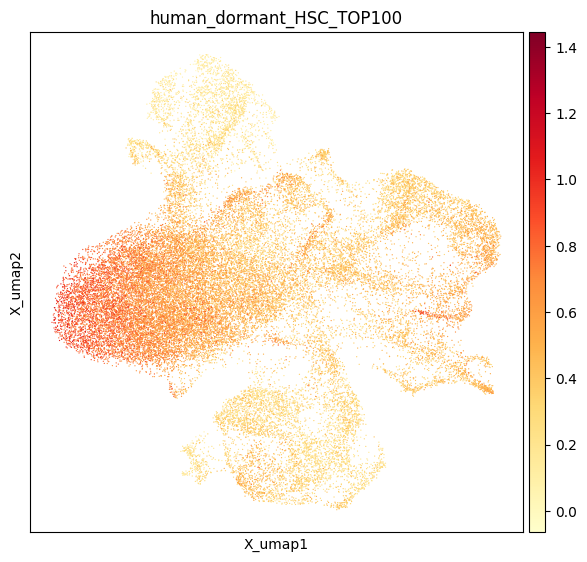

In [52]:
plt.gcf()

In [53]:
adata

AnnData object with n_obs × n_vars = 36878 × 20098
    obs: 'library', 'donor', 'population', 'tissue', 'xample', 'doublet_scores', 'percent.mt', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'seurat_clusters', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.annot.score', 'predicted.annot', 'mapping.score', 'mapping_error_score', 'mapping_error_QC', 'predicted_CellType', 'predicted_CellType_prob', 'predicted_Pseudotime', 'GMP_score', 'MLP_score', 'MEP_score', 'HSC_score', 'Ery_priming_score', 'Meg_priming_score', 'BM_LT_HSC_TOP100', 'BM_ST_HSC_TOP100', 'human_active_HSC_TOP100', 'human_dormant_HSC_TOP100', 'Repopulation_signature', 'BM-type_score', 'SPL-type_score', 'mast_score', 'v6_leiden.20.0', 'v6_leiden.20.0_annot_CB10', 'v6_leiden.20.0_annot_CB45', 'lineage.annot', 'lineage.annot.granular', 'lineage.andy', 'lineage.andy.granular'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'line

## Density plots
---

In [54]:
donor_order = ['P185',
 'P181',
 'P257',
 'paedBM1',
 'paedBM2',
 'healthy_CTRL',
 'bthal005',
 'bthal006',
 'bthal007',
 'bthal008',
 'bthal009',
 'bthal010']

In [55]:
cond_map = dict(zip(donor_order, ['healthy'] * 6 + ['patient'] * 6))

In [56]:
cond_map

{'P185': 'healthy',
 'P181': 'healthy',
 'P257': 'healthy',
 'paedBM1': 'healthy',
 'paedBM2': 'healthy',
 'healthy_CTRL': 'healthy',
 'bthal005': 'patient',
 'bthal006': 'patient',
 'bthal007': 'patient',
 'bthal008': 'patient',
 'bthal009': 'patient',
 'bthal010': 'patient'}

In [58]:
adata.obs.donor.map(cond_map)

SITTC12_AAACCCATCATACAGC.1.0    patient
SITTC12_AAACGAAAGCTAGTTC.1.0    patient
SITTC12_AAAGAACGTAAGCAAT.1.0    patient
SITTC12_AAAGAACTCGGTCATA.1.0    patient
SITTC12_AAAGAACTCTCCTGTG.1.0    patient
                                 ...   
paedBM2_TTTGTTGCATGTGCTA.1.1    healthy
paedBM2_TTTGTTGGTACCATAC.1.1    healthy
paedBM2_TTTGTTGGTCACGACC.1.1    healthy
paedBM2_TTTGTTGGTGTTATCG.1.1    healthy
paedBM2_TTTGTTGTCTGGACCG.1.1    healthy
Name: donor, Length: 36878, dtype: object

In [60]:
adata.obs['condition'] = adata.obs.donor.map(cond_map)

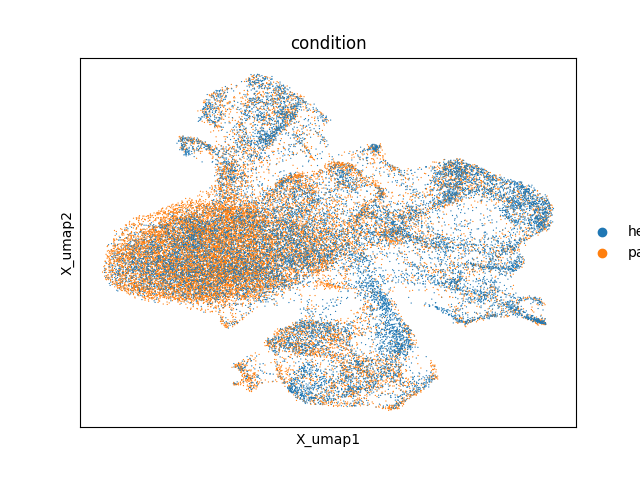

In [61]:
sc.pl.embedding(adata, basis='X_umap', color='condition')

In [62]:
cd34 = [
 'SLX21505_SITTC7_P185-BM-0',
 'SLX21505_SITTD7_P257-BM-0',
 'SLX21505_SITTE7_P181-BM-0',
 'healthy_CTRL_CD34',
 'paedBM1_CD34',
 'paedBM2_CD34',
        
 'bthal005_BM_scr_CD34',
 'bthal006_BM_scr_CD34',       
 'bthal007_BM_scr_CD34',
 'bthal008_BM_scr_CD34',       
 'bthal009_BM_scr_CD34',
 'bthal010_BM_scr_CD34'
]

In [63]:
selection = adata[adata.obs.population.isin(['CD34', 'CD34_CD19neg', ''])].copy()

In [64]:
sc.tl.embedding_density(selection, groupby='condition')

computing density on 'umap'
--> added
    'umap_density_condition', densities (adata.obs)
    'umap_density_condition_params', parameter (adata.uns)


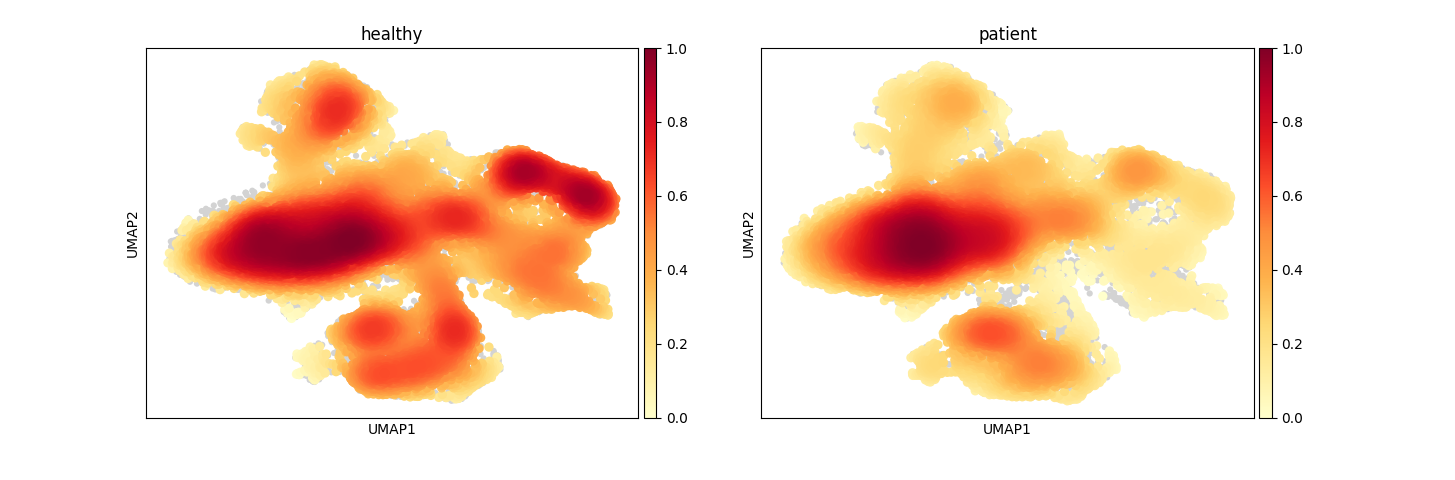

In [81]:
sc.pl.embedding_density( selection, basis='umap', key='umap_density_condition')

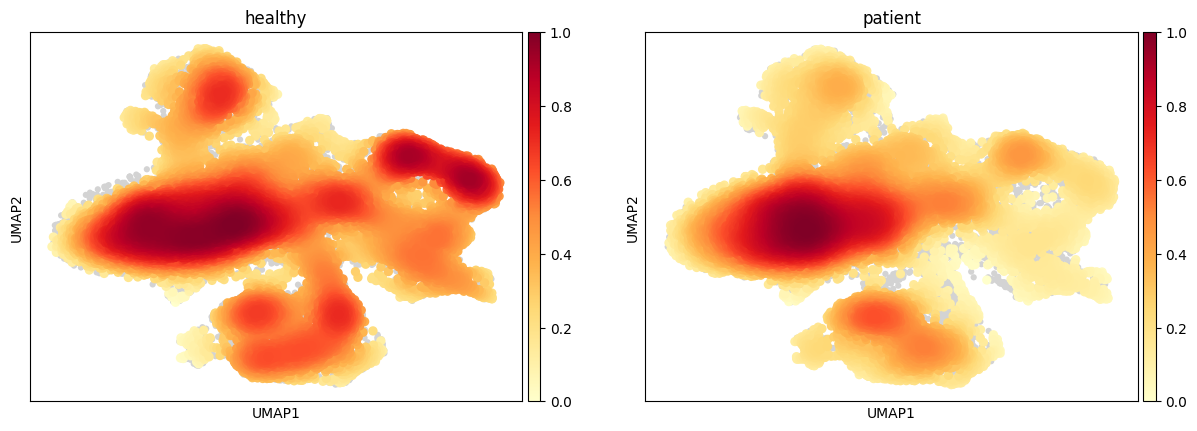

In [82]:
plt.gcf()

bthalcombo_v6b_CD34_condition_density_estimates

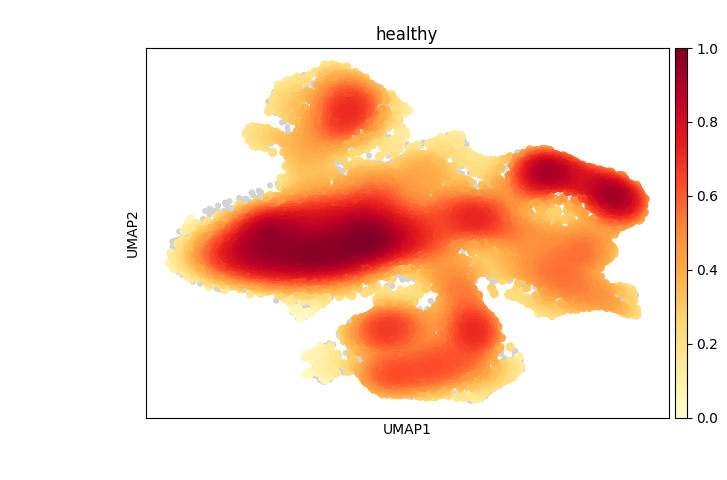

In [89]:
sc.pl.embedding_density( selection, basis='umap', key='umap_density_condition', group='healthy' )

In [90]:
ax = plt.gca()

In [91]:
# https://matplotlib.org/stable/gallery/misc/rasterization_demo.html
# by default all artist have positive integer assigned
# ax.get_children()[0].get_zorder()

# setting the element that has the scatter collections
ax.get_children()[0].set_zorder(-10)

# it should rasterize all artists with z-order below 0
ax.set_rasterization_zorder(0)

In [92]:
%%time
fname = "../output/figures/20240328_bthalcombo_v6b_CD34_healthy_donors_density_estimates_rasterized_UMAP_scatter"

plt.savefig(fname+'.pdf', dpi=600)
plt.savefig(fname+'.svg')

CPU times: user 956 ms, sys: 113 ms, total: 1.07 s
Wall time: 996 ms


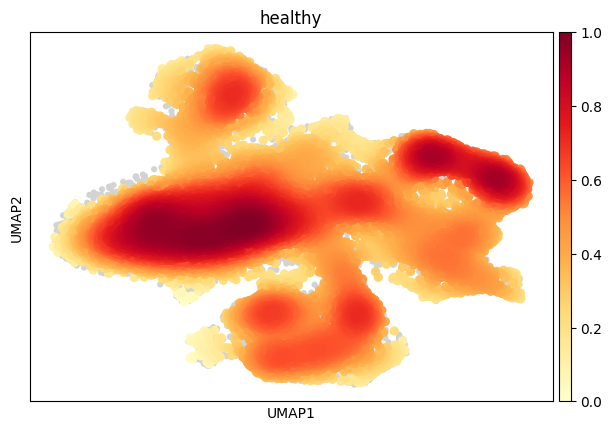

In [93]:
plt.gcf()

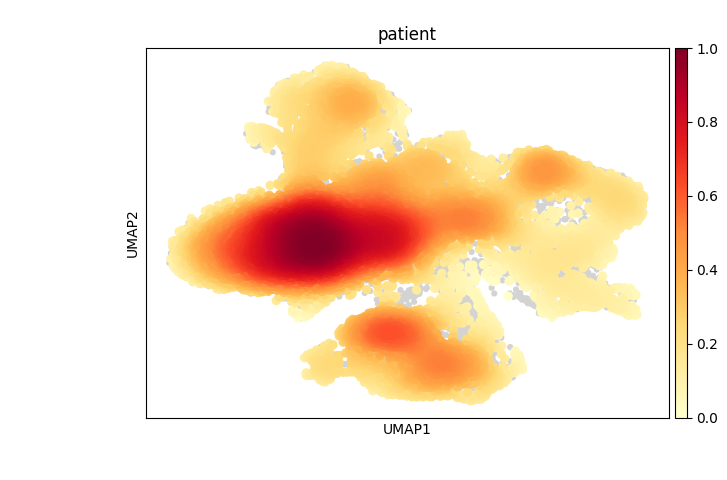

In [96]:
sc.pl.embedding_density( selection, basis='umap', key='umap_density_condition', group='patient' )

In [97]:
ax = plt.gca()

In [98]:
# https://matplotlib.org/stable/gallery/misc/rasterization_demo.html
# by default all artist have positive integer assigned
# ax.get_children()[0].get_zorder()

# setting the element that has the scatter collections
ax.get_children()[0].set_zorder(-10)

# it should rasterize all artists with z-order below 0
ax.set_rasterization_zorder(0)

In [99]:
%%time
fname = "../output/figures/20240328_bthalcombo_v6b_CD34_bthal_donors_density_estimates_rasterized_UMAP_scatter"

plt.savefig(fname+'.pdf', dpi=600)
plt.savefig(fname+'.svg')

CPU times: user 854 ms, sys: 36.8 ms, total: 891 ms
Wall time: 896 ms


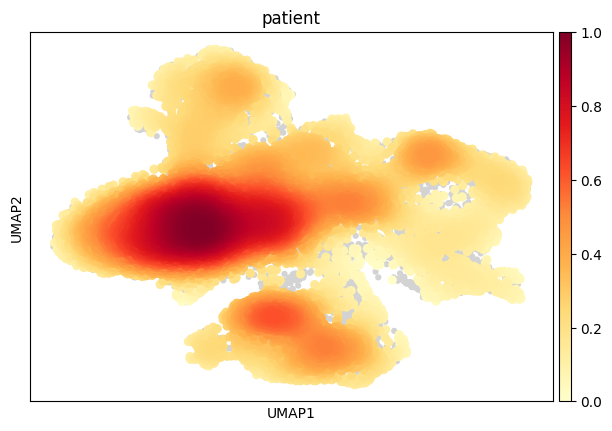

In [100]:
plt.gcf()

## Pseudotime ridgeplots

In [5]:
now = datetime.now()
prefix = now.strftime('%Y%m%d')
print(prefix)

20240408


---
---

In [7]:
%%time
adata = sc.read('20231122_bthalcombo_v6c_cr2_no_B_palantir_pseudotime_kernel')

CPU times: user 16.8 s, sys: 1.19 s, total: 18 s
Wall time: 32.4 s


In [8]:
meta = pd.read_csv('output/20240227_bthalcombo_v6c_cr2_no_B_palantir_trajectories_plus_metadata.txt', index_col=0)

In [9]:
adata.obs =  meta.loc[adata.obs.index].copy()

In [10]:
import joypy

In [11]:
from scipy import stats

### CD34+ Mende HSC/MPP3

In [13]:
hsc = ['bthal005_BM_scr_CD34', 'bthal006_BM_scr_CD34',
       'healthy_CTRL_CD34', 'bthal009_BM_scr_CD34',
       'bthal010_BM_scr_CD34', 'bthal007_BM_scr_CD34', 'bthal008_BM_scr_CD34',
       'bthal007_BM_scr_CD38neg', 'SLX21505_SITTC7_P185-BM-0',
       'SLX21505_SITTE7_P181-BM-0', 'SLX21505_SITTD7_P257-BM-0',
       'paedBM1_CD34', 'paedBM2_CD34']

In [14]:
selection = adata[ np.logical_and(adata.obs.xample.isin(hsc), adata.obs['v6_leiden.20.0_annot_CB10'] == '05_HSC/MPP3') ].obs[['condition', 'palantir_pseudotime']].copy()

In [15]:
selection.shape

(5660, 2)

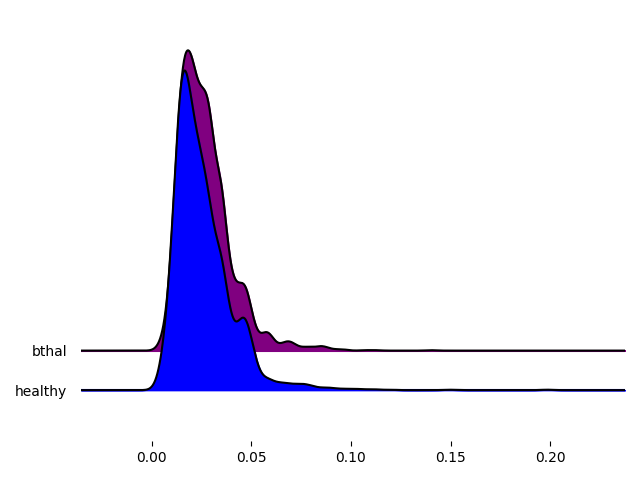

In [16]:
fig, ax = joypy.joyplot(selection, by='condition', overlap=5, color=['purple', 'blue'])

In [17]:
res = stats.ttest_ind(selection[selection.condition == 'bthal']['palantir_pseudotime'].values,
                      selection[selection.condition == 'healthy']['palantir_pseudotime'].values, 
                      equal_var=False )

In [18]:
plt.suptitle('CD34+ C10 HSC/MPP3\n'+'p-value:\n'+str(res[1]))

Text(0.5, 0.98, 'CD34+ C10 HSC/MPP3\np-value:\n0.005515277749736964')

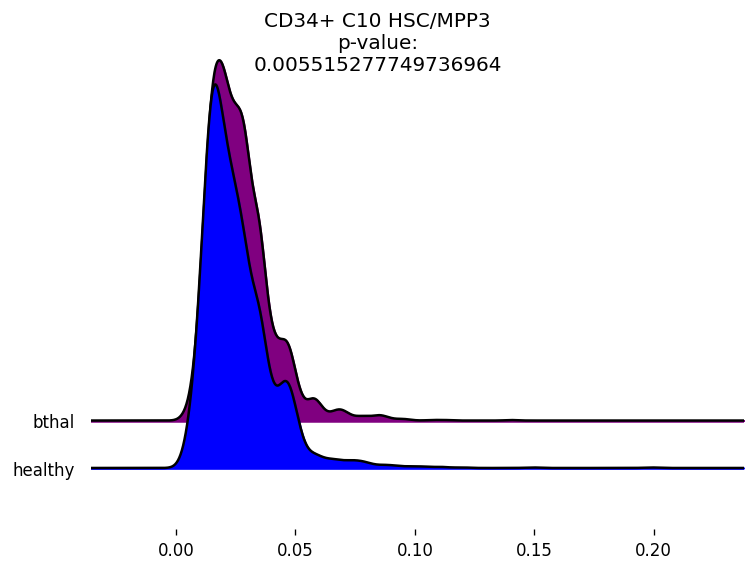

In [19]:
plt.gcf()

In [20]:
plt.savefig('output/20240408_bthalcombo_v6c_CD34_C10_HSCMPP3_bthal_vs_HD_pseudotime_ridgeplots.pdf', dpi=600)
plt.savefig('output/20240408_bthalcombo_v6c_CD34_C10_HSCMPP3_bthal_vs_HD_pseudotime_ridgeplots.svg')

---
---

### phenotypic HSC-MPPs
---

In [11]:
selection = adata[ adata.obs.population == 'HSCMPP' ].obs[['condition', 'palantir_pseudotime']].copy()

In [12]:
selection.shape

(8753, 2)

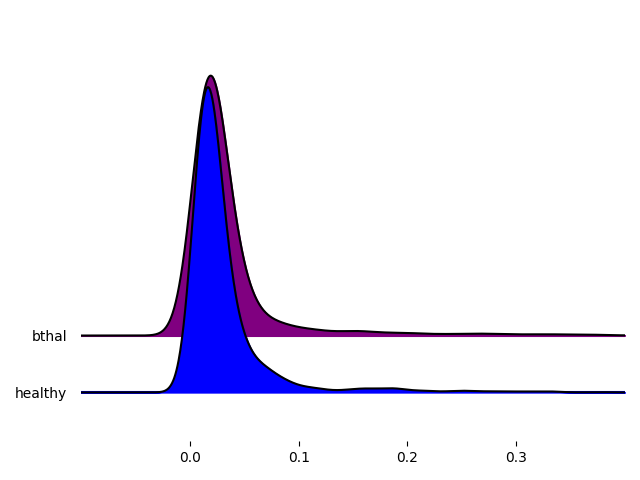

In [21]:
fig, ax = joypy.joyplot(selection, by='condition', overlap=4.5, color=['purple', 'blue'], x_range=[-0.1, 0.4])

In [22]:
res = stats.ttest_ind(selection[selection.condition == 'bthal']['palantir_pseudotime'].values,
                      selection[selection.condition == 'healthy']['palantir_pseudotime'].values, 
                      equal_var=False )

In [23]:
plt.suptitle('all phenotypic HSC-MPP\n'+'p-value:\n'+str(res[1]))

Text(0.5, 0.98, 'all phenotypic HSC-MPP\np-value:\n2.383410201721816e-09')

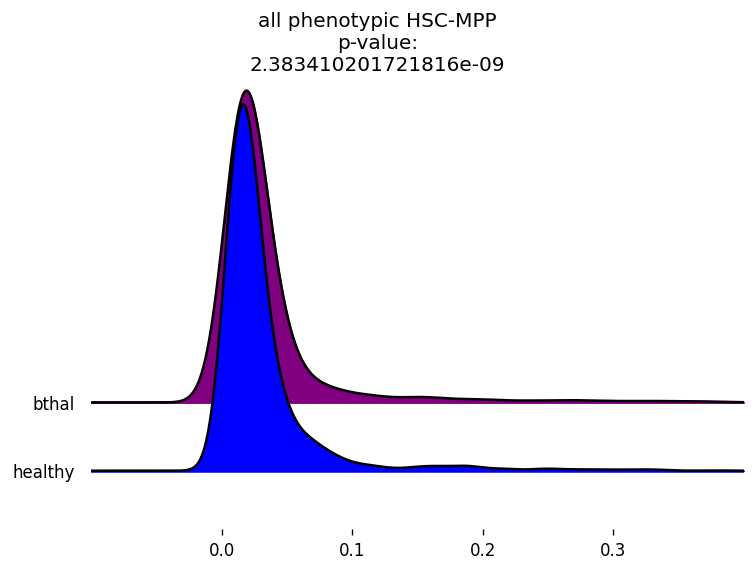

In [24]:
plt.gcf()

In [25]:
plt.savefig('output/20240312_bthalcombo_v6c_all_phenotypic_HSCMMP_bthal_vs_HD_pseudotime_ridgeplots.pdf', dpi=600)

## Histograms

In [22]:
selection = adata[ adata.obs['lineage.annot'] == 'HSC/MPP' ].copy()

In [39]:
selection.obs.donor.unique()

['bthal005', 'bthal006', 'healthy_CTRL', 'bthal010', 'bthal009', ..., 'P185', 'P181', 'P257', 'paedBM1', 'paedBM2']
Length: 12
Categories (12, object): ['P181', 'P185', 'P257', 'bthal005', ..., 'bthal010', 'healthy_CTRL', 'paedBM1', 'paedBM2']

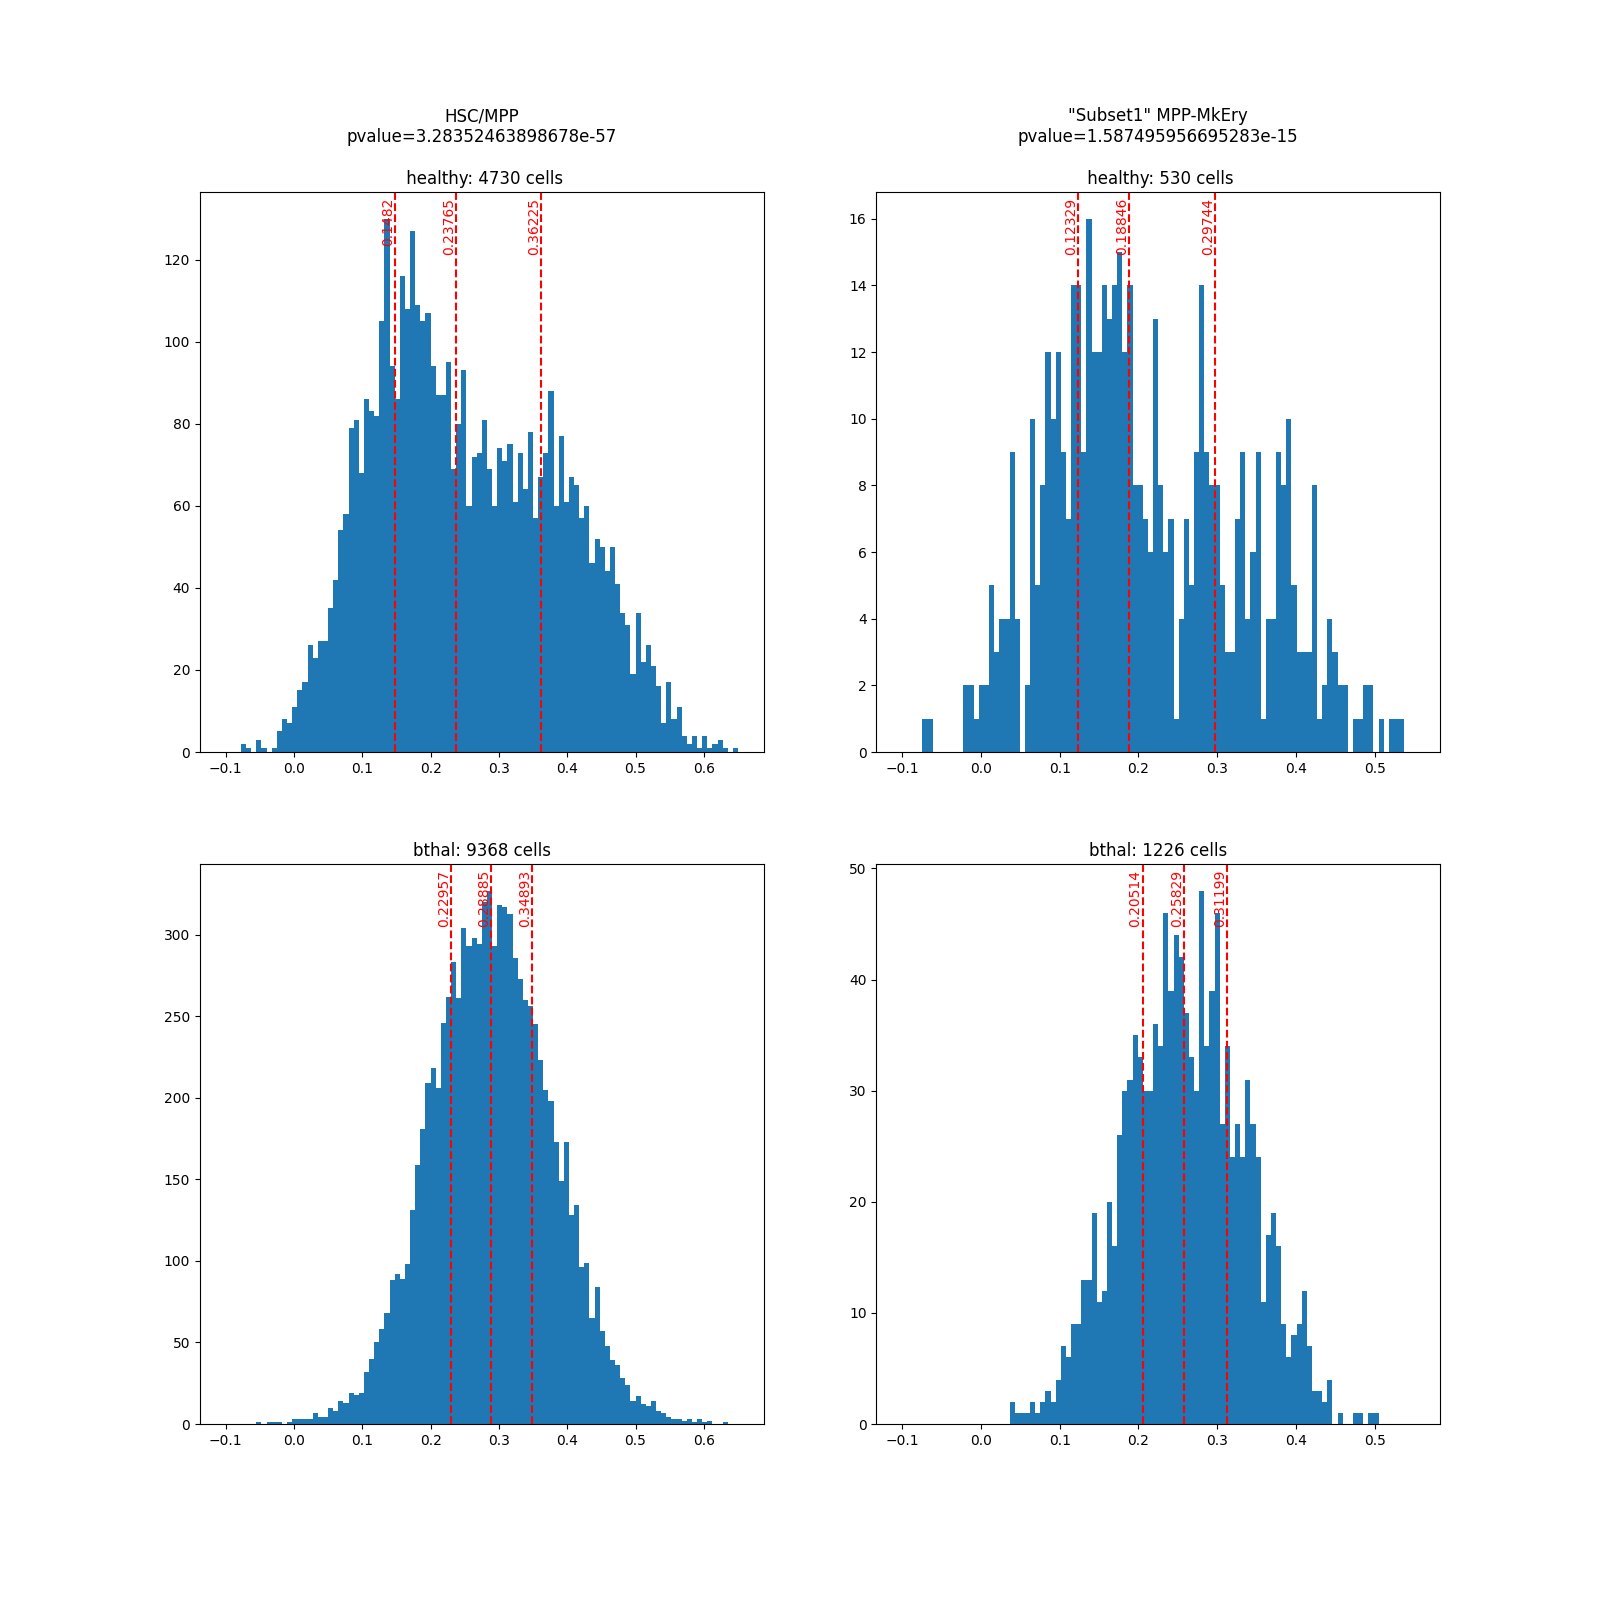

In [50]:
from scipy import stats

set_a1 = selection[ selection.obs.condition == 'healthy' ].obs.subsetoness

set_b1 = selection[ selection.obs.condition == 'bthal' ].obs.subsetoness

res1 = stats.ttest_ind(set_a1, set_b1, equal_var=False)


set_a2 = selection[ np.logical_and(selection.obs.condition == 'healthy',
                          selection.obs['v6_leiden.20.0_annot_CB45'] == 'MPP-MkEry') ].obs.subsetoness

set_b2 = selection[ np.logical_and(selection.obs.condition == 'bthal',
                          selection.obs['v6_leiden.20.0_annot_CB45'] == 'MPP-MkEry') ].obs.subsetoness

res2 = stats.ttest_ind(set_a2, set_b2, equal_var=False)



fig,ax = plt.subplots(2,2, figsize=(16,16))
ax = ax.ravel()



ax[0].hist(set_a1, range=[-0.1, 0.65], bins=100)
ax[0].set_title('HSC/MPP\npvalue='+str(res1.pvalue)+'\n\n healthy: '+str(len(set_a1))+' cells')

ax[2].hist(set_b1, range=[-0.1, 0.65], bins=100)
ax[2].set_title('bthal: '+str(len(set_b1))+' cells')


ax[1].hist(set_a2, range=[-0.1, 0.55], bins=100)
ax[1].set_title('"Subset1" MPP-MkEry\npvalue='+str(res2.pvalue)+'\n\n healthy: '+str(len(set_a2))+' cells')

ax[3].hist(set_b2, range=[-0.1, 0.55], bins=100)
ax[3].set_title('bthal: '+str(len(set_b2))+' cells')




values_a1 = set_a1.quantile([0.25, 0.5, 0.75]).values

for v in values_a1:
    ax[0].axvline(v, color='red', linestyle='--')
    ax[0].text(v, 0.99, round(v, 5), color='r', ha='right', va='top', rotation=90,
            transform=ax[0].get_xaxis_transform())


values_b1 = set_b1.quantile([0.25, 0.5, 0.75]).values

for v in values_b1:
    ax[2].axvline(v, color='red', linestyle='--')
    ax[2].text(v, 0.99, round(v, 5), color='r', ha='right', va='top', rotation=90,
            transform=ax[2].get_xaxis_transform())




values_a2 = set_a2.quantile([0.25, 0.5, 0.75]).values

for v in values_a2:
    ax[1].axvline(v, color='red', linestyle='--')
    ax[1].text(v, 0.99, round(v, 5), color='r', ha='right', va='top', rotation=90,
            transform=ax[1].get_xaxis_transform())

values_b2 = set_b2.quantile([0.25, 0.5, 0.75]).values

for v in values_b2:
    ax[3].axvline(v, color='red', linestyle='--')
    ax[3].text(v, 0.99, round(v, 5), color='r', ha='right', va='top', rotation=90,
            transform=ax[3].get_xaxis_transform())

#plt.tight_layout()

In [51]:
plt.savefig('../output/figures/'+prefix+'_HSCMPP_plus_Subset1_MPPMkEry_bthal_vs_healthy_histograms_v2.svg')

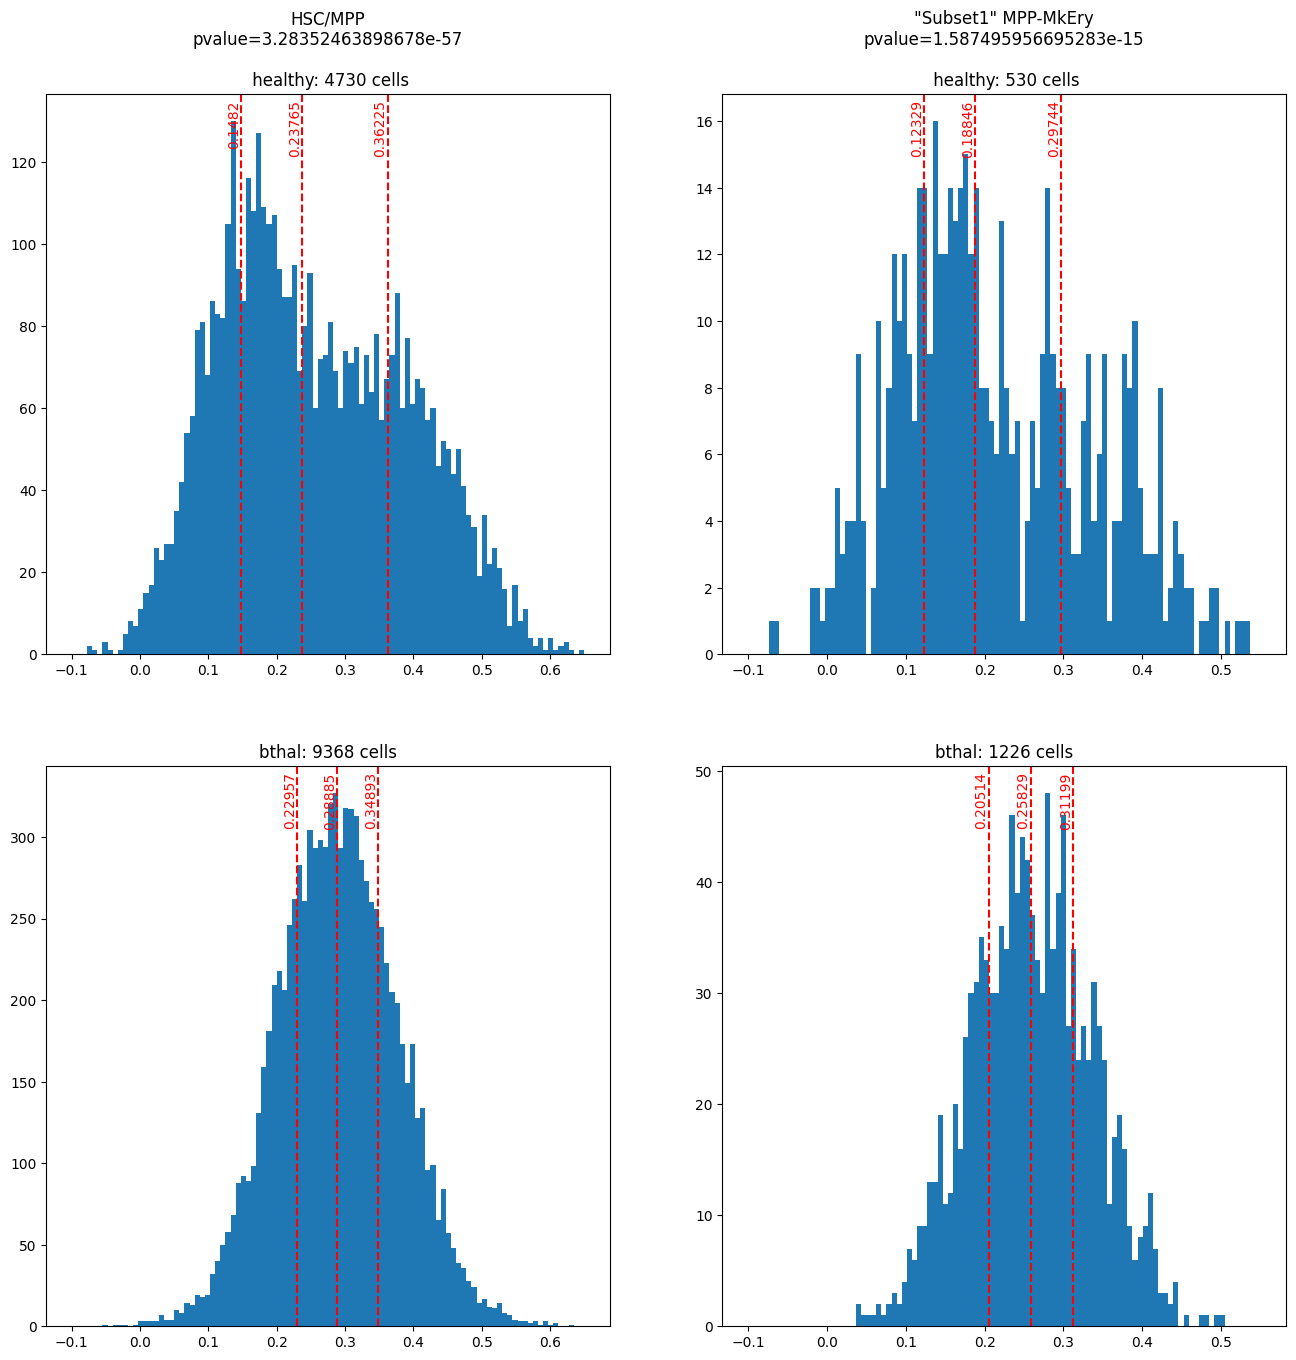

In [52]:
plt.gcf()

# END